# Analysing dynamics structures 

## Imports

Run the below cell to get all required modules:

In [11]:
import numpy as np
import MDAnalysis as mda
import MDAnalysis.analysis.rms
import matplotlib.pyplot as plt

## Read in `.dcd` files

First, let's define the path to all of the data files:

In [5]:
data_path = "data/"

Then, we can load in the trajectory `.dcd` file so we can get a list of all frames in the trajectory:

In [7]:
frames = []
with mda.lib.formats.libdcd.DCDFile(data_path+"ligand_10.dcd") as trajectory_file:
    for frame in trajectory_file:
        frames.append(frame)

# RMSD for protein

## Create required structures

Here we first define the first frame of the trajectory from the above list.

Then, we create an MDAnalysis Universe object and a reference Universe so we can calculate the RMSD of the protein.

In [8]:
first_frame = frames[0].xyz
universe = mda.Universe(data_path+"ligand_10.prmtop", data_path+"ligand_10.dcd")
reference_universe = mda.Universe(data_path+"ligand_10.prmtop", first_frame)

We need to select only the protein, as the structure also contains waters and the ligand, that we don't need for the protein RMSD calculation:

In [9]:
protein_structure = universe.select_atoms("protein")
reference_protein_structure = reference_universe.select_atoms("protein")

## RMSD calculation

Finally, we can calculate the RMSD with respect to the protein backbone:

In [12]:
rmsd_protein = mda.analysis.rms.RMSD(protein_structure, reference_protein_structure, select="backbone")
rmsd_protein.run()

Now we can look at the RMSD result. 

We transpose the result, as this makes it easier for plotting:

In [14]:
rmsd_result = rmsd_protein.results.rmsd.T
print(rmsd_result)

[[0.00000000e+00 1.00000000e+00 2.00000000e+00 ... 4.99700000e+03
  4.99800000e+03 4.99900000e+03]
 [0.00000000e+00 4.88882123e-05 9.77764246e-05 ... 2.44294397e-01
  2.44343285e-01 2.44392173e-01]
 [7.49928569e-07 5.84204231e-01 6.99914328e-01 ... 2.45271977e+00
  2.42505997e+00 2.44376368e+00]]


In the results list of arrays, the first array is the frame number, second array is the time in picoseconds and the third array is the RMSD result for that frame and time.

In [15]:
time = rmsd_result[1]
rmsd_values = rmsd_result[2]

## Plot RMDS for protein

Text(0, 0.5, 'RMSD ($\\AA$)')

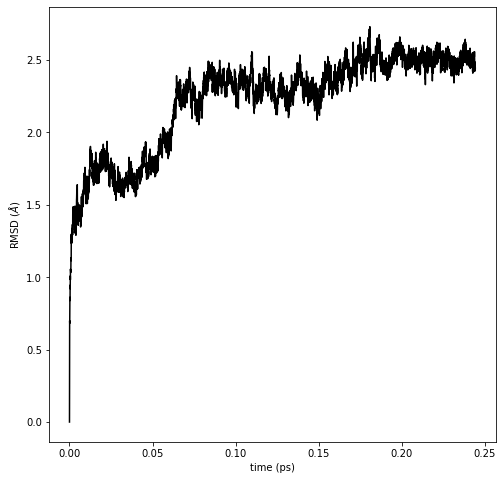

In [16]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.plot(time, rmsd_values, "k-")
ax.set_xlabel("time (ps)", fontsize = 14)
ax.set_ylabel(r"RMSD ($\AA$)")